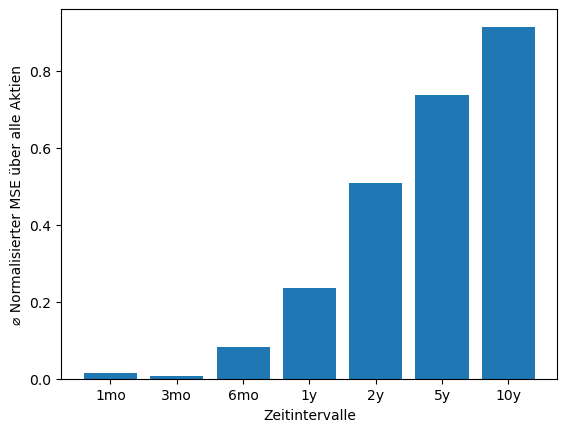

In [4]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

assets = ["AAPL", "GOOGL","MSFT"] 
intervalls=  ["1mo", "3mo", "6mo", "1y", "2y", "5y", "10y"]
means= []
results = pd.DataFrame(index=assets,columns=intervalls)

#Durchführen Lineare Regression für jede Aktie und jedes Intervall
for element in assets:
    for time in intervalls:
            msft = yf.Ticker(element)
            df = msft.history(period=time)
            df.reset_index(inplace=True)
            df["Date"] = pd.Series(df["Date"], dtype="string")
            train, test = train_test_split(df, test_size=0.2, random_state=42)
            X_train = np.array(train.index).reshape(-1, 1)
            y_train = train["Close"]
            X_test = np.array(test.index).reshape(-1, 1)
            y_test = test["Close"]
            model = LinearRegression()
            model.fit(X_train, y_train)
            X_all = np.array(df.index).reshape(-1, 1)
            predictions = model.predict(X_all)
            predictionstest = model.predict(X_test)
            predictionstrain = model.predict(X_train)
            mse = mean_squared_error(y_test, predictionstest)
            results.at[element, time] = mse

#Normalisierung der MSE
results = results.transpose()
for element in results:
    scaler = MinMaxScaler()
    results[element] = scaler.fit_transform(results[[element]])

#Berechnung der durschnittlichen MSE für jedes Intervall
results = results.transpose()
for element in results:
    means.append(results[element].mean())

ywerte = means
xwerte = intervalls
plt.bar(xwerte, ywerte)
plt.xlabel("Zeitintervalle")
plt.ylabel("⌀ Normalisierter MSE über alle Aktien")
plt.show()